# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [121]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [122]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90, high=90, size=1500)
lngs = np.random.uniform(low=-180, high=180, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [123]:
url = "http://api.openweathermap.org/data/2.5/weather?"

#counter
record = 0
sets = 1

#create DataFrame
weather_df = pd.DataFrame({"City": cities})

weather_df["Country"] = ""
weather_df["Date"] = ""
weather_df["Latitude"] = ""
weather_df["Longitude"] = ""
weather_df["Cloudiness (%)"] = ""
weather_df["Humidity (%)"] = ""
weather_df["Max Temp (F)"] = ""
weather_df["Wind Speed (mph)"] = ""

print("Beginning Data Retrieval")
print("-----------------------------")

for index, row in weather_df.iterrows():
    city = row["City"]

    query_url = url + "&q=" + city + "&APPID=" + weather_api_key
    weather_response = requests.get(query_url).json()

    try:
        print(f"Processing Record {record} of Set {sets} | {city}.")

        weather_df.loc[index, "Country"] = weather_response["sys"]["country"]
        weather_df.loc[index, "Date"] = datetime.datetime.fromtimestamp(weather_response["dt"])
        weather_df.loc[index, "Latitude"] = weather_response["coord"]["lat"]
        weather_df.loc[index, "Longitude"] = weather_response["coord"]["lon"]
        weather_df.loc[index, "Cloudiness (%)"] = weather_response["clouds"]["all"]
        weather_df.loc[index, "Humidity (%)"] = weather_response["main"]["humidity"]
        weather_df.loc[index, "Max Temp (F)"] = 1.8 * (weather_response["main"]["temp_max"] - 273) + 32
        weather_df.loc[index, "Wind Speed (mph)"] = weather_response["wind"]["speed"]

    except:
        print(f"City not found. Skipping...")

    record = record + 1
    if record == 50:
        record = 0
        sets = sets + 1

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 | filadelfia.
City not found. Skipping...
Processing Record 1 of Set 1 | qaanaaq.
City not found. Skipping...
Processing Record 2 of Set 1 | tuatapere.
City not found. Skipping...
Processing Record 3 of Set 1 | bluff.
City not found. Skipping...
Processing Record 4 of Set 1 | jamestown.
City not found. Skipping...
Processing Record 5 of Set 1 | hobart.
City not found. Skipping...
Processing Record 6 of Set 1 | tianpeng.
City not found. Skipping...
Processing Record 7 of Set 1 | iqaluit.
City not found. Skipping...
Processing Record 8 of Set 1 | hamilton.
City not found. Skipping...
Processing Record 9 of Set 1 | little current.
City not found. Skipping...
Processing Record 10 of Set 1 | axim.
City not found. Skipping...
Processing Record 11 of Set 1 | attawapiskat.
City not found. Skipping...
Processing Record 12 of Set 1 | belushya guba.
City not found. Skipping...
Processing Record 13 of Set 1 | dikso

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [124]:
weather_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,filadelfia,US,,,,,,,
1,qaanaaq,GL,,,,,,,
2,tuatapere,NZ,,,,,,,
3,bluff,NZ,,,,,,,
4,jamestown,US,,,,,,,


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

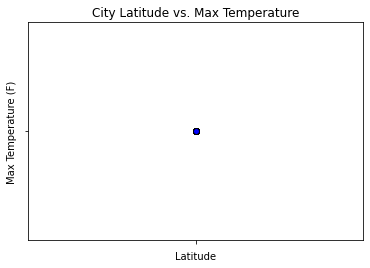

In [126]:
plt.scatter(weather_df["Latitude"], weather_df["Max Temp (F)"], edgecolors="black", facecolors="blue")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature")
plt.show()

## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'City Latitude vs. Humidity (%)')

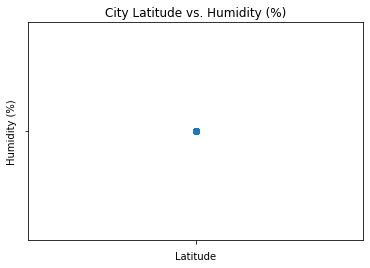

In [127]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity (%)"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (%)")

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'City Latitude vs. Cloudiness (%)')

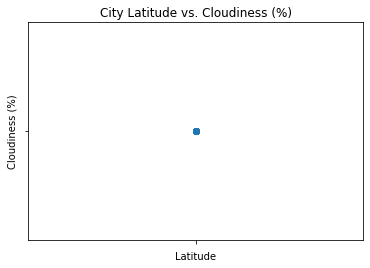

In [128]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness (%)"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (%)")

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'City Latitude vs. Wind Speed (mph)')

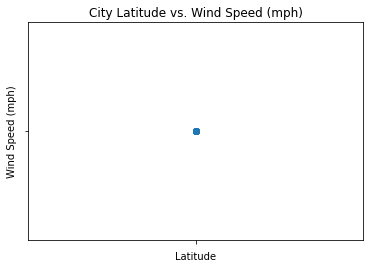

In [129]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed (mph)"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (mph)")

## Linear Regression

In [137]:
northern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]) > 0, :]
southern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [138]:
x_values = northern_df["Latitude"]
y_values = northern_df["Max Temp (F)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = x_values * slope + interceptq
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regression_values, "r-")
plt.annotate(line_eq, fontsize=10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northen Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue}")
plt.show()

ValueError: Inputs must not be empty.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [139]:
x_values = southern_df["Latitude"]
y_values = southern_df["Max Temp (F)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
lin_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regression_values, "r-")
plt.annotate(line_eq, fontsize=10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue}")
plt.show()

ValueError: Inputs must not be empty.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [140]:
x_values = northern_df["Latitude"]
y_values = northern_df["Humidity (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regression_values, "r-")
plt.annotate(lne_eq, fontsize=10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northen Hemisphere - Humidity (%) vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue}")
plt.show()

ValueError: Inputs must not be empty.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [141]:
x_values = southern_df["Latitude"]
y_values = southern_df["Humidity (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regression_values, "r-")
plt.annotate(line_eq, fontsize=10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue}")
plt.show()

ValueError: Inputs must not be empty.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [142]:
x_values = northern_df["Latitude"]
y_values = northern_df["Cloudiness (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values= x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regression_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue}")
plt.show()

ValueError: Inputs must not be empty.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [146]:
x_values = southern_df["Latitude"]
y_values = southern_df["Cloudiness (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values= x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regression_values, "r-")
plt.annotate(line_eq, fontsize=10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue}")
plt.show()

ValueError: Inputs must not be empty.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [149]:
x_values = northern_df["Latitude"]
y_values = northern_df["Wind Speed (mph)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regression_values, "r-")
plt.annotate(line_eq, fontsize=10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue}")
plt.show()

ValueError: Inputs must not be empty.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [150]:
x_values = southern_df["Latitude"]
y_values = southern_df["Wind Speed (mph)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regression_values, "r-")
plt.annotate(line_eq, fontsize=10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue}")
plt.show()

ValueError: Inputs must not be empty.